In [1]:
ColabNotebook = 'google.colab' in str(get_ipython())

if ColabNotebook:
    # monta G-drive en entorno COLAB
    from google.colab import drive
    drive.mount('/content/drive/')

    DATOS_DIR = '/content/drive/MyDrive/Colab Notebooks/DATOS/'      # carpeta donde se encuentran los datasets
else:
    DATOS_DIR   = '../Datos/' # carpeta donde se encuentran los datasets

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
from sklearn import preprocessing, metrics, model_selection
from sklearn.neural_network import MLPClassifier

In [3]:
df_train = pd.read_csv(DATOS_DIR + 'optdigits_train.csv')
X_train = np.array(df_train.iloc[:,:-1]).astype(float)
Y_train = np.array(df_train.iloc[:,-1])

df_test = pd.read_csv(DATOS_DIR + 'optdigits_test.csv')
X_test = np.array(df_test.iloc[:,:-1]).astype(float)
Y_test = np.array(df_test.iloc[:,-1])

In [4]:
normalizarEntrada = 1  # 1 si normaliza; 0 si no

if normalizarEntrada:
    # Escala los valores entre 0 y 1
    min_max_scaler = preprocessing.StandardScaler()
    X_train = min_max_scaler.fit_transform(X_train)
    X_test = min_max_scaler.transform(X_test)
    

In [5]:
clf = MLPClassifier(solver='sgd', learning_rate_init=0.05,
                    hidden_layer_sizes=(15,), random_state=1,
                    max_iter=2000, 
                    verbose=False,  tol=1.0e-05,
                    batch_size=1, 
                    activation='logistic')
ini = time.time()
history = clf.fit(X_train,Y_train)
fin = time.time()
print("duracion = %.5f seg." % (fin-ini))

duracion = 17.55079 seg.


In [6]:
clf = MLPClassifier(solver='sgd', learning_rate_init=0.05,
                    hidden_layer_sizes=(15,), random_state=1,
                    max_iter=2000, 
                    verbose=False,  tol=1.0e-05,
                    batch_size=200, 
                    activation='logistic')
ini = time.time()
history = clf.fit(X_train,Y_train)
fin = time.time()
print("duracion = %.5f seg." % (fin-ini))

duracion = 8.96722 seg.


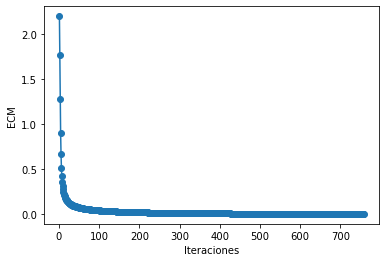

In [7]:
plt.plot(range(1, len(history.loss_curve_) + 1), history.loss_curve_, marker='o')
plt.xlabel('Iteraciones')
plt.ylabel('ECM')
plt.show()

In [8]:
Y_pred = clf.predict(X_train)
print("%% aciertos X_train : %.3f" % metrics.accuracy_score(Y_train,Y_pred))

% aciertos X_train : 1.000


In [9]:
report = metrics.classification_report(Y_train,Y_pred)
print("Confusion matrix Training:\n%s" % report) 

Confusion matrix Training:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       376
           1       1.00      1.00      1.00       389
           2       1.00      1.00      1.00       380
           3       1.00      1.00      1.00       389
           4       1.00      1.00      1.00       387
           5       1.00      1.00      1.00       376
           6       1.00      1.00      1.00       377
           7       1.00      1.00      1.00       387
           8       1.00      1.00      1.00       380
           9       1.00      1.00      1.00       382

    accuracy                           1.00      3823
   macro avg       1.00      1.00      1.00      3823
weighted avg       1.00      1.00      1.00      3823



In [10]:
MM = metrics.confusion_matrix(Y_train,Y_pred)
print("Confusion matrix:\n%s" % MM)

Confusion matrix:
[[376   0   0   0   0   0   0   0   0   0]
 [  0 389   0   0   0   0   0   0   0   0]
 [  0   0 380   0   0   0   0   0   0   0]
 [  0   0   0 389   0   0   0   0   0   0]
 [  0   0   0   0 387   0   0   0   0   0]
 [  0   0   0   0   0 376   0   0   0   0]
 [  0   0   0   0   0   0 377   0   0   0]
 [  0   0   0   0   0   0   0 387   0   0]
 [  0   0   0   0   0   0   0   0 380   0]
 [  0   0   0   0   0   0   0   0   0 382]]


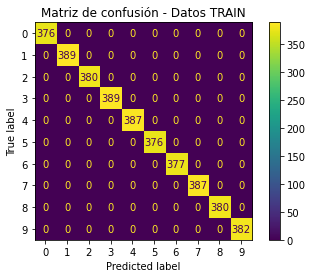

In [11]:
fig=metrics.plot_confusion_matrix(clf, X_train, Y_train) 
plt.title("Matriz de confusión - Datos TRAIN") 
plt.show()

% aciertos X_test : 0.959

Confusion matrix Test:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       178
           1       0.94      0.99      0.96       182
           2       0.98      0.94      0.96       177
           3       0.96      0.96      0.96       183
           4       0.98      0.98      0.98       181
           5       0.94      0.97      0.96       182
           6       1.00      0.99      0.99       181
           7       0.98      0.94      0.96       179
           8       0.92      0.89      0.90       174
           9       0.91      0.94      0.93       180

    accuracy                           0.96      1797
   macro avg       0.96      0.96      0.96      1797
weighted avg       0.96      0.96      0.96      1797

Confusion matrix:
[[177   0   0   0   0   0   0   0   1   0]
 [  0 180   0   0   0   0   0   0   2   0]
 [  0   1 166   3   0   0   0   0   7   0]
 [  0   0   2 176   0   2   0   1   0   2]
 

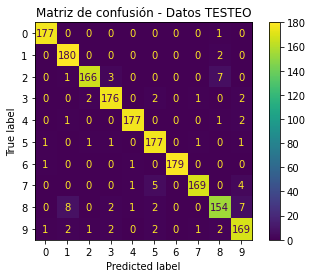

In [12]:
# -- TESTING ---
Y_pred= clf.predict(X_test)
print("%% aciertos X_test : %.3f\n" % metrics.accuracy_score(Y_test,Y_pred))

report = metrics.classification_report(Y_test, Y_pred)
print("Confusion matrix Test:\n%s" % report) 

MM = metrics.confusion_matrix(Y_test, Y_pred)
print("Confusion matrix:\n%s" % MM)

fig=metrics.plot_confusion_matrix(clf, X_test, Y_test)  
plt.title("Matriz de confusión - Datos TESTEO")
plt.show()